# Weak Mpi scaling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
df = pd.read_csv('../data/wmpi_timings2400000.csv')

In [3]:
# Calculate the mean time for each value of the 'Threads' column
mean_times = df.groupby('Cores')['Time'].mean().reset_index()

print(mean_times)
type(mean_times)

    Cores      Time
0       1  0.537221
1       2  0.406582
2       3  0.800051
3       4  0.772331
4       5  1.213301
..    ...       ...
59     60  3.929524
60     61  4.257690
61     62  3.974632
62     63  3.910685
63     64  4.299955

[64 rows x 2 columns]


pandas.core.frame.DataFrame

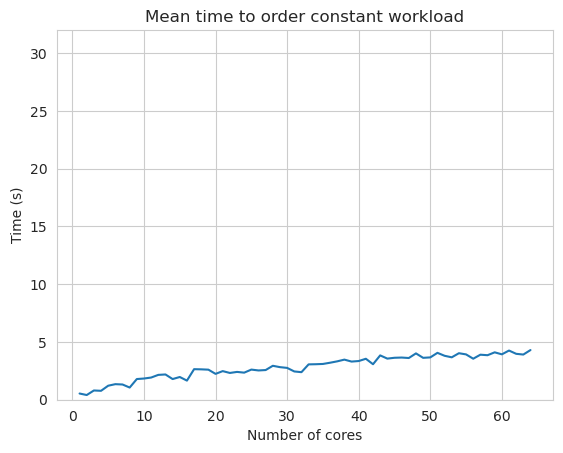

In [4]:
# Plot the mean timings with seaborn

sns.set_style("whitegrid")
ax = sns.lineplot(x="Cores", y="Time", data=mean_times)

ax.set(ylim=(0, 32))

ax.set_title('Mean time to order constant workload')
ax.set_xlabel('Number of cores')
ax.set_ylabel('Time (s)')
plt.show()

In [5]:
df1 = pd.read_csv('../data/wmpi2_timings2400000.csv')
df1.head()

,Size,Cores,Time
0,156000000,65,4.275350
1,156000000,65,4.991451
2,156000000,65,3.999078
3,156000000,65,5.469089
4,156000000,65,4.881606


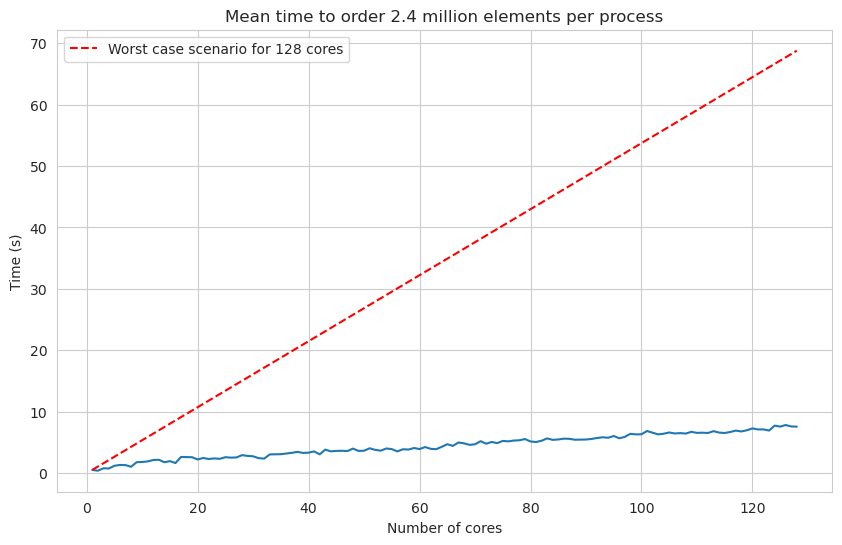

In [9]:
total_wmpi = pd.concat([df, df1], ignore_index=True)

mean_times_total = total_wmpi.groupby('Cores')['Time'].mean().reset_index()

ax = sns.lineplot(x="Cores", y="Time", data=mean_times_total)

#ax.set(ylim=(0, 68))
#ax.axhline(mean_times_total['Time'][0]*128, ls='--', color='r', label='Worst case scenario for 128 cores')
x = np.arange(1, 129)
y = mean_times_total['Time'][0]*x
plt.plot(x, y, 'r--', label='Worst case scenario for 128 cores')

ax.set_title('Mean time to order 2.4 million elements per process')
ax.set_xlabel('Number of cores')
ax.set_ylabel('Time (s)')
plt.legend()

fig = plt.gcf()
fig.set_size_inches(10, 6)
fig.savefig('wmpi_timings.png', dpi=300)

plt.show()